In [11]:
#!unzip -o "/content/drive/MyDrive/dog vision/dog-breed-identification.zip" -d "/content/drive/MyDrive/dog vision"


In [12]:
len(os.listdir("/content/drive/MyDrive/dog vision/train")), len(os.listdir("/content/drive/MyDrive/dog vision/test"))

(10222, 10357)

In [13]:
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib as plt

In [14]:
labels_csv = pd.read_csv("drive/My Drive/dog vision/labels.csv")
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

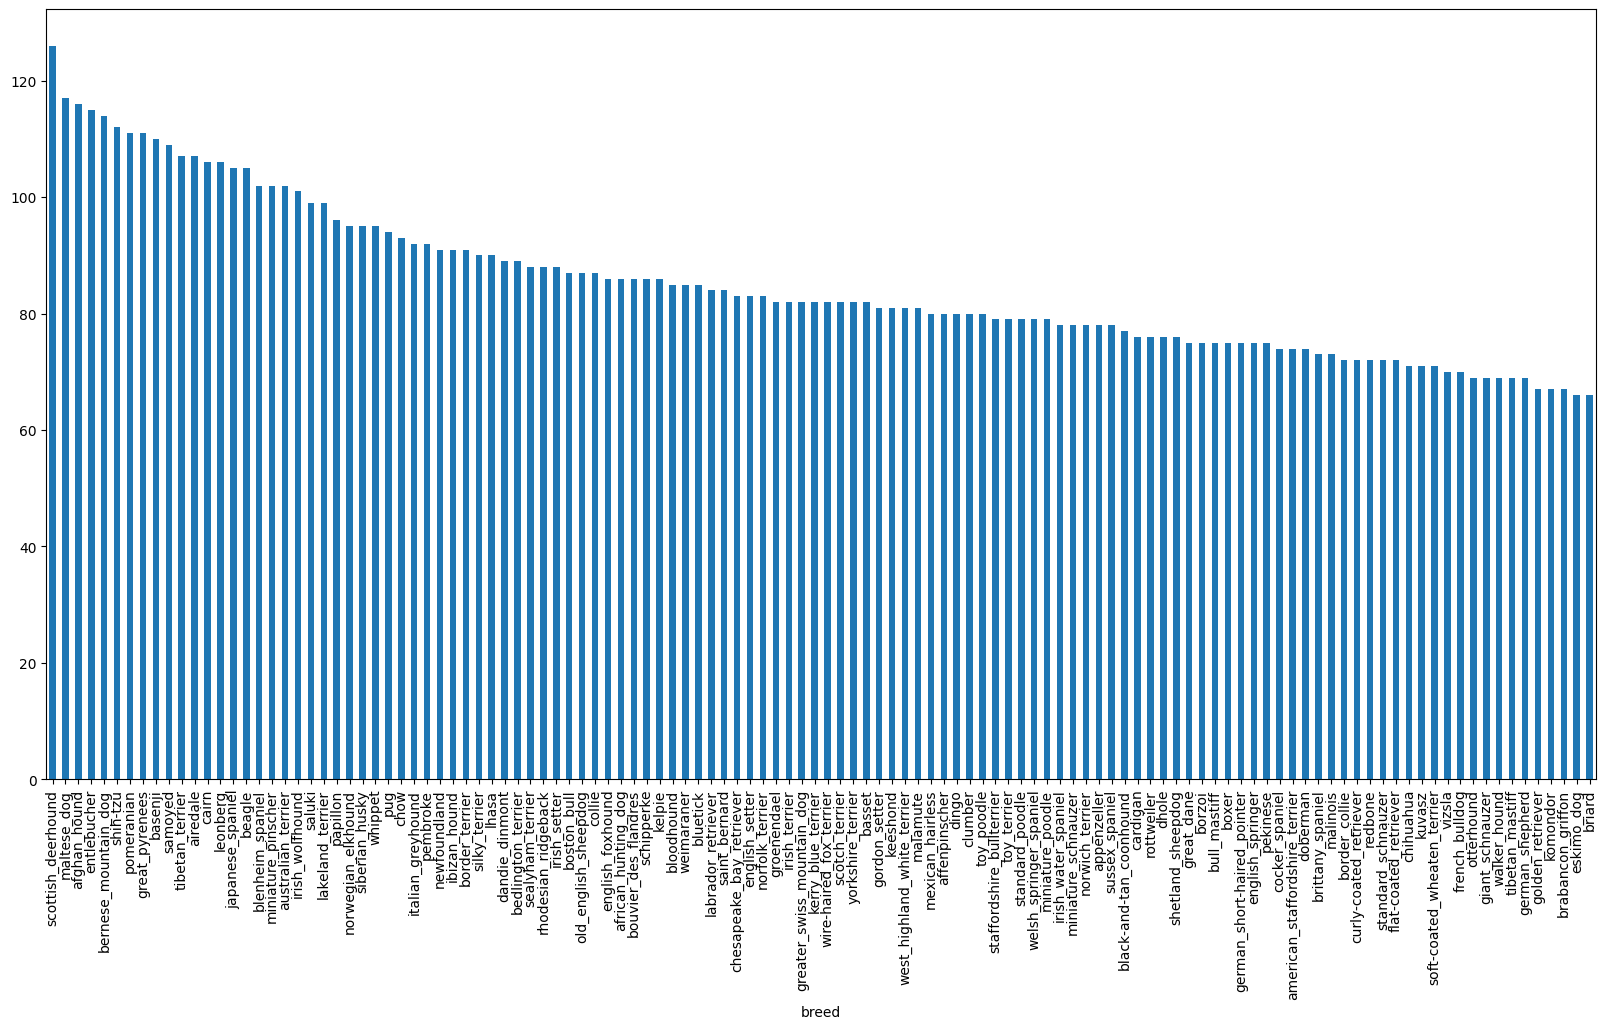

In [15]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [16]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [17]:
filenames = ["drive/My Drive/dog vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:5]

['drive/My Drive/dog vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/dog vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/dog vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/dog vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/dog vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [18]:
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [19]:
len(filenames)

10222

In [20]:
if len(filenames) == len(labels):
  print("ok")
else:
  print("bad")

ok


In [21]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [22]:
labels[0] == unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [47]:
bool_labels = [label == unique_breeds for label in labels]
bool_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [24]:
# Example: Turning boolean array into integers
print(bool_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [25]:
X = filenames
y = bool_labels

In [26]:
# set the number of images to be trained on to save time
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state =42)
len(X_train), len(X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

In [28]:
IMG_SIZE = 224

def process_image(image_path, image_size=IMG_SIZE):

  # first read the image using tf
  image = tf.io.read_file(image_path)

  # convert the image into rgb(3 channels)
  image = tf.image.decode_jpeg(image, channels=3)

  # convert the image from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

  #reize image to sqare of 224
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

In [29]:
# now we have to make tensor tuples(image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)

  return image, label

In [30]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [31]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [32]:
len(train_data), len(val_data)

(25, 7)

In [33]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  plt.figure(figsize=(10, 10))

  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])

    plt.axis("off")

##Showing dog images and their labels

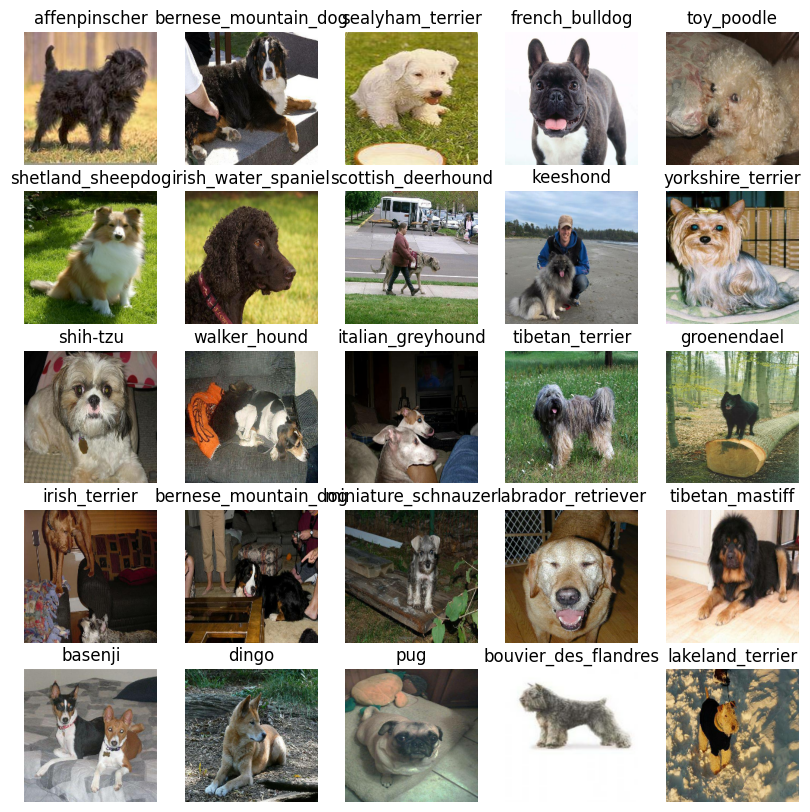

In [34]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

In [35]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  # 3 is the no of color channels
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [36]:
import tf_keras
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Using model", MODEL_URL)

  model = tf_keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf_keras.layers.Dense(units=OUTPUT_SHAPE, activation="softmax")])

  model.compile(loss = tf_keras.losses.CategoricalCrossentropy(),
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])

  model.build(INPUT_SHAPE)

  return model

In [38]:
model = create_model()
model.summary()

Using model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [39]:
%load_ext tensorboard

In [40]:
import datetime
import os

def create_callback():
  log_dir = os.path.join("/content/drive/MyDrive/dog vision/logs",
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf_keras.callbacks.TensorBoard(log_dir)

In [41]:
early_stopping = tf_keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [42]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}

In [43]:
def train_model():
  model=create_model()
  tensorboard = create_callback()
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data= val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])

  return model


In [44]:
#model = train_model()

In [45]:
#%tensorboard --logdir /content/drive/MyDrive/dog\ vision/logs

In [48]:
predictions = model.predict(val_data, verbose=1)
predictions

7/7 [==============================] - 1s 208ms/step


array([[2.3039997e-02, 4.4862181e-03, 3.9970172e-03, ..., 2.3824458e-03,
        7.4855490e-03, 1.4756380e-02],
       [9.8982698e-04, 1.0021292e-02, 4.3249484e-03, ..., 5.0680670e-03,
        1.6679551e-03, 1.2891041e-03],
       [6.9625443e-03, 1.0269011e-03, 2.7233006e-03, ..., 1.3445423e-03,
        2.1313080e-03, 3.6389693e-03],
       ...,
       [1.3529022e-02, 7.8430510e-04, 1.2421226e-03, ..., 6.8560829e-03,
        1.2445218e-03, 6.1721266e-03],
       [1.5040389e-02, 2.6548288e-03, 8.9007197e-03, ..., 2.6719596e-02,
        2.2919321e-02, 1.8294468e-03],
       [3.8023838e-03, 6.8397787e-03, 3.2186501e-05, ..., 4.8871792e-04,
        3.9152377e-03, 6.7114374e-03]], dtype=float32)

In [49]:
predictions[0]


array([2.30399966e-02, 4.48621809e-03, 3.99701716e-03, 9.97523312e-04,
       1.85536183e-02, 2.74976366e-03, 5.21545531e-03, 7.54312729e-04,
       1.26904168e-03, 4.01447760e-03, 3.48610408e-03, 2.57431320e-03,
       4.82464442e-03, 1.44584877e-02, 2.72943551e-04, 1.75483932e-03,
       1.86316945e-04, 3.38899740e-03, 3.15619819e-03, 1.18235813e-03,
       6.00582396e-04, 1.29181356e-03, 3.92494863e-03, 5.11995750e-03,
       1.24839158e-03, 2.59799813e-03, 8.89667252e-04, 6.47133170e-03,
       1.77163463e-02, 1.77534268e-04, 5.61994314e-03, 2.26786407e-03,
       3.32416338e-03, 6.56264485e-04, 4.21289215e-03, 7.86888995e-04,
       6.03729393e-03, 8.56020022e-04, 1.07555855e-02, 2.01688390e-02,
       1.79342250e-03, 2.83181593e-02, 4.01578320e-04, 4.00330266e-03,
       8.88749771e-03, 9.83613660e-04, 2.90094526e-03, 2.10144673e-03,
       1.68247670e-02, 2.79258937e-04, 3.54113081e-03, 6.48211862e-04,
       1.87854376e-03, 5.05896704e-03, 2.99819745e-04, 3.53290862e-03,
      

In [50]:
index=42
print(predictions[index])
print(f"Max probability : {np.max(predictions[index])} ")
print(f"sum : {np.sum(predictions[index])}")
print(f"Max index of label : {np.argmax(predictions[index])}")
print(f"Predicted label : {unique_breeds[np.argmax(predictions[index])]}")

[1.91693678e-01 1.38309773e-03 1.27976280e-04 1.05992903e-03
 3.39094806e-03 5.11678401e-03 1.93363219e-03 2.63613113e-03
 2.37768237e-03 2.77257152e-02 3.11562995e-04 4.13403520e-03
 7.91158807e-03 2.54105739e-02 1.98443257e-03 1.73948565e-03
 1.52810384e-03 4.86281095e-03 1.22540435e-02 4.17199743e-04
 3.22340103e-03 9.91492183e-04 3.51384003e-03 2.13971734e-03
 9.17133875e-04 8.51992145e-03 5.56262396e-03 2.66728015e-03
 2.23484784e-02 7.67475599e-03 4.58369934e-04 3.39387287e-03
 3.33988247e-03 2.69580656e-03 9.44960024e-03 1.77894570e-02
 3.24895233e-02 6.43075095e-04 4.63857548e-03 8.26660020e-04
 9.68705397e-03 2.57848739e-03 5.25460113e-03 3.60535528e-03
 5.48009388e-03 3.03188630e-04 1.30350320e-02 3.42241488e-03
 6.47208013e-04 8.16955138e-03 1.02644647e-02 2.37418618e-03
 1.68829726e-03 1.73407458e-02 7.45058153e-03 2.86987377e-03
 6.15402241e-04 6.32475421e-04 7.36147389e-02 1.99916330e-03
 7.80335395e-04 8.92116036e-03 8.44243634e-03 6.64231414e-03
 1.76334195e-02 2.118184

In [51]:
unique_breeds[119]

'yorkshire_terrier'

In [52]:
def get_pred_label(predictions_probabilities):
  return unique_breeds[np.argmax(predictions_probabilities)]


pred_label = get_pred_label(predictions[81])
pred_label

'keeshond'

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels (truth labels).

In [53]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [54]:
def unbatchify(data):
  images=[]
  labels=[]

  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images,labels

val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [55]:
def plot_pred(predictions_probabilities, labels, images, n=1):
  pred_prob, true_label, image = predictions_probabilities[n], labels[n], images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label == true_label:
    color="green"
  else:
    color="red"

  plt.title("{}{:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)


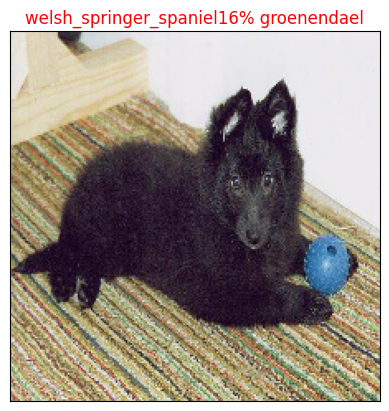

In [56]:
plot_pred(predictions_probabilities=predictions, labels=val_labels, images=val_images, n=77)


In [57]:

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

In [91]:
#plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=52)

In [93]:
'''i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()'''

'i_multiplier = 20\nnum_rows = 3\nnum_cols = 2\nnum_images = num_rows*num_cols\nplt.figure(figsize=(10*num_cols, 5*num_rows))\nfor i in range(num_images):\n  plt.subplot(num_rows, 2*num_cols, 2*i+1)\n  plot_pred(predictions,\n            labels=val_labels,\n            images=val_images,\n            n=i+i_multiplier)\n  plt.subplot(num_rows, 2*num_cols, 2*i+2)\n  plot_pred_conf(prediction_probabilities=predictions,\n                 labels=val_labels,\n                 n=i+i_multiplier)\nplt.tight_layout(h_pad=1.0)\nplt.show()'

In [60]:
def save_model(model, suffix=None):
  model_dir = os.path.join("/content/drive/MyDrive/dog vision/models", datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = model_dir + "-" + suffix + ".h5"
  print(f"Saving model to {model_path}")
  model.save(model_path)
  return model_path

In [61]:
def load_model(model_path):
  model = tf_keras.models.load_model(model_path, custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [62]:
save_model(model, suffix="1000-images-mobilenetv2-adam")

Saving model to /content/drive/MyDrive/dog vision/models/20241025-19411729885279-1000-images-mobilenetv2-adam.h5


/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/dog vision/models/20241025-19411729885279-1000-images-mobilenetv2-adam.h5'

In [63]:
loaded_1000_image_model = load_model("/content/drive/MyDrive/dog vision/models/20241006-10441728211473-1000-images-mobilenetv2-adam.h5")

In [64]:
model.evaluate(val_data)

7/7 [==============================] - 2s 162ms/step - loss: 6.0241 - accuracy: 0.0050


[6.024141311645508, 0.004999999888241291]

## Now, we train on the whole dataset

In [65]:
full_data = create_data_batches(X,y)
full_data

Creating training data batches...


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [66]:
full_model = create_model()

Using model https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [67]:
#create model callbacks
full_model_tensorboard = create_callback()
full_model_early_stopping = tf_keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

In [68]:
#full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

In [69]:
#save_model(full_model, suffix="full-dataset-mobilenetv2-adam")

In [70]:
loaded_full_model = load_model("/content/drive/MyDrive/dog vision/models/20241007-07251728285941-full-dataset-mobilenetv2-adam.h5")

#making predictions on the whole dataset


In [71]:
test_path = "/content/drive/MyDrive/dog vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/dog vision/test/efb4e5dc776a639a140b022cf0835eb5.jpg',
 '/content/drive/MyDrive/dog vision/test/f3ef677ea2641c7ef7ece6ce1ba11b2f.jpg',
 '/content/drive/MyDrive/dog vision/test/ea5ae600ca3996528b6548eceac767cf.jpg',
 '/content/drive/MyDrive/dog vision/test/f1040b51b35ad34a0d35068af4e9cc2f.jpg',
 '/content/drive/MyDrive/dog vision/test/f56080803871563e96541a57ad1a08c4.jpg',
 '/content/drive/MyDrive/dog vision/test/ec907a287a8aff0cc9d2eab8045d75aa.jpg',
 '/content/drive/MyDrive/dog vision/test/f402e15e75051b9491283307b947680e.jpg',
 '/content/drive/MyDrive/dog vision/test/f0154b8ea1efd5dfb70e43fada42e56d.jpg',
 '/content/drive/MyDrive/dog vision/test/eab189c5274b79b36dd566fea4e9847e.jpg',
 '/content/drive/MyDrive/dog vision/test/ec28370f936f20133526ee5bdb894c9c.jpg']

In [72]:
len(test_filenames)

10357

In [73]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches...


In [74]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [75]:
#test_predictions = loaded_full_model.predict(test_data, verbose=1)

In [76]:
#np.savetxt("/content/drive/MyDrive/dog vision/dog-vision-prediction-probabilites-array.csv", test_predictions, delimiter=",")

In [77]:
test_predictions = np.loadtxt("/content/drive/MyDrive/dog vision/dog-vision-prediction-probabilites-array.csv", delimiter=",")
test_predictions[:10]

array([[1.09449103e-10, 3.54359675e-09, 2.21072387e-08, ...,
        1.03108923e-05, 4.28425340e-09, 4.61456177e-12],
       [2.47891074e-12, 2.59780447e-10, 6.45271190e-14, ...,
        1.72247233e-14, 3.30011765e-15, 2.16739188e-16],
       [3.48604723e-09, 7.33020936e-11, 6.33591013e-10, ...,
        9.03694064e-10, 3.10044811e-07, 1.21401167e-09],
       ...,
       [1.21333837e-11, 9.79882397e-10, 7.08256387e-09, ...,
        6.02595733e-08, 8.56331724e-07, 2.56700772e-10],
       [1.07196682e-10, 5.05989117e-09, 9.99910593e-01, ...,
        1.54560398e-09, 4.62271360e-10, 2.30882780e-09],
       [1.18479911e-12, 2.10623009e-13, 9.21177284e-12, ...,
        1.81510562e-09, 1.32030650e-10, 3.46388093e-13]])

In [78]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [79]:
test_path

'/content/drive/MyDrive/dog vision/test/'

In [80]:
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_ids[:5]

['efb4e5dc776a639a140b022cf0835eb5',
 'f3ef677ea2641c7ef7ece6ce1ba11b2f',
 'ea5ae600ca3996528b6548eceac767cf',
 'f1040b51b35ad34a0d35068af4e9cc2f',
 'f56080803871563e96541a57ad1a08c4']

In [81]:
preds_df["id"]= test_ids
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,efb4e5dc776a639a140b022cf0835eb5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f3ef677ea2641c7ef7ece6ce1ba11b2f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ea5ae600ca3996528b6548eceac767cf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f1040b51b35ad34a0d35068af4e9cc2f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f56080803871563e96541a57ad1a08c4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,efb4e5dc776a639a140b022cf0835eb5,1.094491e-10,3.543597e-09,2.210724e-08,1.083686e-12,6.972192e-04,5.454665e-03,9.807745e-09,3.524639e-05,4.194034e-11,...,2.792325e-05,1.376818e-08,1.634046e-11,4.888462e-07,2.332393e-09,7.604318e-10,3.546246e-06,1.031089e-05,4.284253e-09,4.614562e-12
1,f3ef677ea2641c7ef7ece6ce1ba11b2f,2.478911e-12,2.597804e-10,6.452712e-14,5.028142e-16,5.187415e-13,5.863897e-14,5.610077e-13,1.656587e-14,2.324420e-17,...,8.077478e-17,1.128632e-15,8.240123e-17,9.710479e-13,1.232839e-15,2.654774e-16,2.146721e-13,1.722472e-14,3.300118e-15,2.167392e-16
2,ea5ae600ca3996528b6548eceac767cf,3.486047e-09,7.330209e-11,6.335910e-10,2.684390e-14,1.383279e-07,1.167680e-07,1.627799e-09,1.698887e-06,5.459185e-11,...,3.606569e-10,2.380776e-09,1.648112e-13,3.227765e-07,5.730135e-10,1.412833e-07,2.176048e-09,9.036941e-10,3.100448e-07,1.214012e-09
3,f1040b51b35ad34a0d35068af4e9cc2f,1.390411e-10,1.021192e-12,9.243678e-14,1.443033e-13,1.059514e-13,9.458853e-12,3.891004e-10,1.786501e-14,1.356712e-12,...,1.138366e-12,9.515209e-14,5.440529e-10,2.376735e-11,4.096482e-12,2.323568e-07,1.564006e-14,1.134198e-12,2.859944e-14,1.439255e-08
4,f56080803871563e96541a57ad1a08c4,5.387370e-13,1.408738e-08,2.293870e-07,1.016933e-12,1.571786e-11,1.331684e-08,2.892210e-10,2.704732e-09,1.524218e-10,...,1.012716e-11,1.122828e-10,1.741731e-11,4.992904e-08,2.570866e-09,7.406734e-10,6.812674e-10,3.859447e-11,1.667425e-09,1.196776e-08


In [83]:
preds_df.to_csv("drive/MyDrive/dog vision/full_model_submission_preds_mobilent_v2.csv", index=False)

In [84]:
custom_path = "drive/MyDrive/dog vision/local_images/"
custom_image_path = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_path = [path for path in custom_image_path if not path.endswith(".ipynb_checkpoints")]

In [85]:
custom_image_path

['drive/MyDrive/dog vision/local_images/stray_dog_513872.jpg',
 'drive/MyDrive/dog vision/local_images/images.jpg',
 'drive/MyDrive/dog vision/local_images/images (1).jpg',
 'drive/MyDrive/dog vision/local_images/pexels-svetozar-milashevich-99573-1490908.jpg']

In [86]:
custom_data = create_data_batches(custom_image_path, test_data=True)
custom_data

Creating test data batches...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [87]:
custom_preds = loaded_full_model.predict(custom_data)

1/1 [==============================] - 2s 2s/step


In [88]:
custom_preds.shape

(4, 120)

In [89]:
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['clumber', 'irish_terrier', 'flat-coated_retriever', 'pomeranian']